# Sklasyfikowanie wiadomości jako spam lub nie-spam

### Cel

* Dostrojenie parametrów klasyfikatora
* Minimalizacja stopy błędów (FNR)
* Przy zapewnieniu stopy błędów (FPR) poniżej 0.5%

## Rozmiar danych

In [1]:
import pandas as pd

dataframe = pd.read_csv("./data/spam.dat")

X = dataframe.drop(['target'], axis = 1)
y = dataframe.target

print(X.shape)
print(y.shape)

(4789, 462)
(4789,)


## Klasyfikator - K najbliższych sąsiadów (KNeighborsClassifier)

In [2]:
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

def KNeighborsClassification(k):
    clf = KNeighborsClassifier(n_neighbors = k)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(clf, X_test, y_test)     
    report = classification_report(y_test, y_pred, output_dict=True)
    
    FNR = round((1 - report['yes']['recall']) * 100, 2)
    FPR = round((1 - report['no']['recall']) * 100, 2)
    
    print(
        'K:', k,
        ' | FNR:', FNR, ' %',
        ' | FPR:', FPR, ' % |\n'
    )
    
    plt.show()
    
    return FNR, FPR

## Parametry klasyfikatora

* Liczba najbliższych sąsiadów (1, 2, 3, 4, 5, 6, 8, 10)

K: 1  | FNR: 9.78  %  | FPR: 0.7  % |



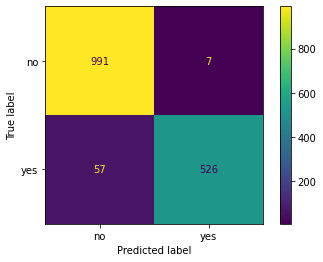

K: 2  | FNR: 16.47  %  | FPR: 0.2  % |



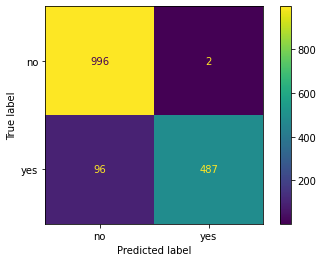

K: 3  | FNR: 14.24  %  | FPR: 0.3  % |



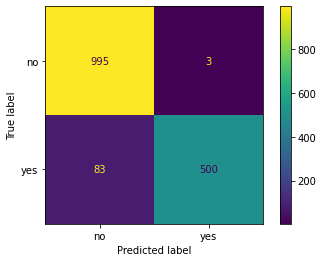

K: 4  | FNR: 19.04  %  | FPR: 0.1  % |



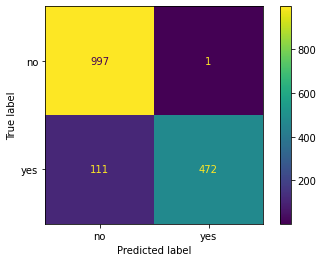

K: 5  | FNR: 17.32  %  | FPR: 0.2  % |



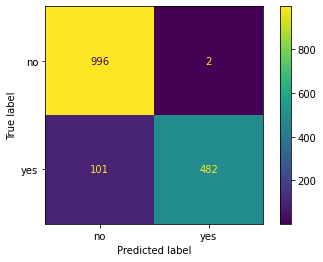

K: 6  | FNR: 22.13  %  | FPR: 0.1  % |



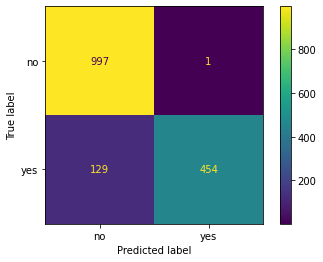

K: 8  | FNR: 25.73  %  | FPR: 0.1  % |



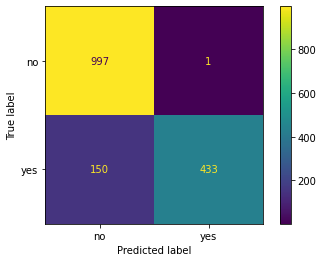

K: 10  | FNR: 27.96  %  | FPR: 0.1  % |



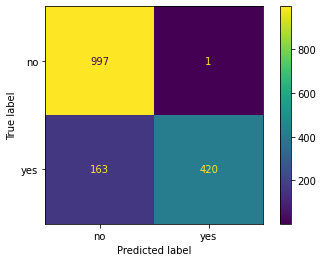

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123, test_size=0.33)

fnr_arr = []
fpr_arr = []

k_arr = [1, 2, 3, 4, 5, 6, 8, 10]

for k in k_arr:
    fnr, fpr = KNeighborsClassification(k)
    
    fnr_arr.append(fnr)
    fpr_arr.append(fpr)

### Wykres FNR w zależności od liczby najbliższych sąsiadów

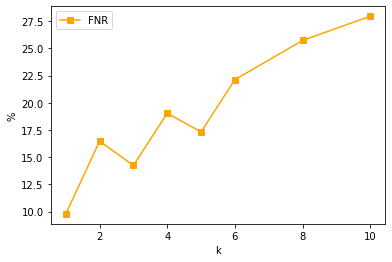

In [4]:
plt.plot(k_arr, fnr_arr, label = "FNR", marker='s', color='orange')
plt.xlabel('k')
plt.ylabel('%')
plt.legend()
plt.show()

### Wykres FPR w zależności od liczby najbliższych sąsiadów

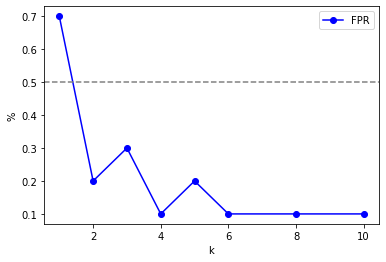

In [5]:
plt.plot(k_arr, fpr_arr, label = "FPR", marker='o', color='blue')
plt.xlabel('k')
plt.ylabel('%')
plt.legend()
plt.axhline(y=0.5, color='gray', linestyle='--')
plt.show()

### Wykres porównawczy FNR i FPR w zależności od liczby najbliższych sąsiadów

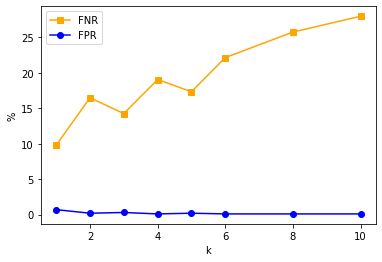

In [6]:
plt.plot(k_arr, fnr_arr, label = "FNR", marker='s', color='orange')
plt.plot(k_arr, fpr_arr, label = "FPR", marker='o', color='blue')
plt.xlabel('k')
plt.ylabel('%')
plt.legend()
plt.show()

## Redukcja wymiarowości danych (feature selection)

* PCA - n_components (25, 50, 100, 200)

N_components:  25 

K: 3  | FNR: 6.17  %  | FPR: 1.0  % |



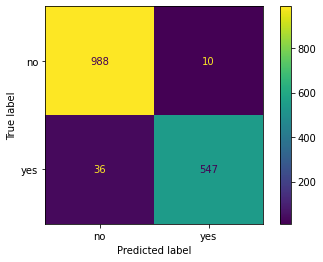

N_components:  50 

K: 3  | FNR: 7.89  %  | FPR: 0.5  % |



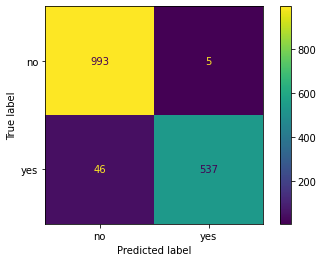

N_components:  100 

K: 3  | FNR: 12.01  %  | FPR: 0.4  % |



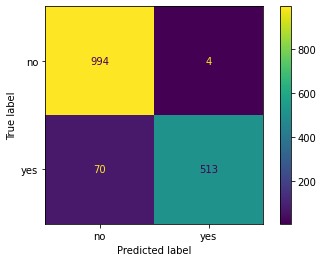

N_components:  200 

K: 3  | FNR: 13.21  %  | FPR: 0.3  % |



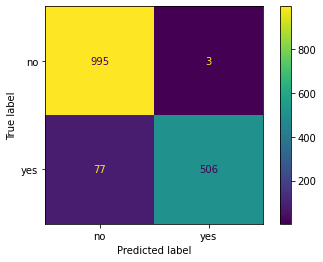

In [7]:
from sklearn.decomposition import PCA

components_arr = [25, 50, 100, 200]

fnr_arr = []
fpr_arr = []

for n in components_arr:

    pca = PCA(n_components = n)

    X_pca = pca.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, random_state=123, test_size=0.33)

    print('N_components: ', n, '\n')
    
    fnr, fpr = KNeighborsClassification(k = 3)
    
    fnr_arr.append(fnr)
    fpr_arr.append(fpr)

### Wykres FNR w zależności od n kompentów redukcji PCA

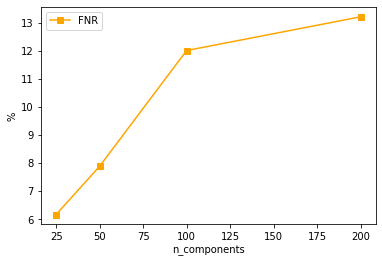

In [9]:
plt.plot(components_arr, fnr_arr, label = "FNR", marker='s', color='orange')
plt.xlabel('n_components')
plt.ylabel('%')
plt.legend()
plt.show()

### Wykres FPR w zależności od n kompentów redukcji PCA

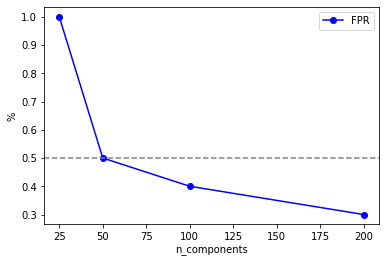

In [10]:
plt.plot(components_arr, fpr_arr, label = "FPR", marker='o', color='blue')
plt.xlabel('n_components')
plt.ylabel('%')
plt.legend()
plt.axhline(y=0.5, color='gray', linestyle='--')
plt.show()

### Wykres porównawczy FNR i FPR w zależności od n kompentów redukcji PCA

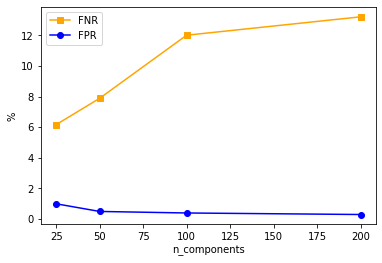

In [11]:
plt.plot(components_arr, fnr_arr, label = "FNR", marker='s', color='orange')
plt.plot(components_arr, fpr_arr, label = "FPR", marker='o', color='blue')
plt.xlabel('n_components')
plt.ylabel('%')
plt.legend()
plt.show()